In [6]:
import pandas as pd

#parameters
hydro_LCOE_low = 0  #   TO BE DETERMINED
hydro_LCOE_mid = 100  # TO BE DETERMINED => use this for band
hydro_LCOE_high = 0  # TO BE DETERMINED
hydro_CAPEX_low = 1600000 #$/MW
hydro_CAPEX_high = 5000000 #$/MW
hydro_environmental_impact = 3.92 #kgCO2eq/MWh  

solar_LCOE_low = 53 #$/MWh
solar_LCOE_mid = 78 #$/MWh  => use this for band
solar_LCOE_high = 93 #$/MWh
solar_CAPEX_low = 860000 #$/MW
solar_CAPEX_high = 1100000 #$/MW
solar_environmental_impact = 45 #kgCO2eq/MWh


wind_LCOE_low = 25 #$/MWh
wind_LCOE_mid = 59 #$/MWh    => use this for band
wind_LCOE_high = 100 #$/MWh
wind_CAPEX_low = 1580000 #$/MW
wind_CAPEX_high = 1880000 #$/MW
wind_environmental_impact = 12 #kgCO2eq/MWh

#COGEN TO DO

#THERMAL PLANT TO DO

ensoe = pd.read_excel('classification_ENSOE.xlsx')
ensoe = ensoe.fillna('')
ensoe = ensoe.melt(id_vars=['ENSO Type', 'Season'], var_name='Month', value_name='Value')
ensoe['Season'] = ensoe.apply(lambda row: row['Season'][:4] if row['Month'] in ['July', 'August', 'September', 'October', 'November', 'December'] else row['Season'][-4:], axis=1)
ensoe['Date'] = ensoe['Season'] + ' ' + ensoe['Month']
ensoe['Date'] = pd.to_datetime(ensoe['Date'], format='%Y %B')
# ensoe['Date'] = ensoe['Date'].dt.strftime('%Y-%m')
ensoe = ensoe.drop(columns=['Season', 'Month'])
ensoe = ensoe.sort_values(by='Date')
# El nino > +0.5
# La nina < -0.5
# -0.5> neutral <+0.5
#correlation between ENSO and production of hydro, solar, wind, thermal, cogen
#COGENERATION
prod_cogen_2018 = pd.read_csv('../../xm_API/production/datasets_production_2018/definitive_production_df_list_cogen_2018.csv')
prod_cogen_2019 = pd.read_csv('../../xm_API/production/datasets_production_2019/definitive_production_df_list_cogen_2019.csv')
prod_cogen_2020 = pd.read_csv('../../xm_API/production/datasets_production_2020/definitive_production_df_list_cogen_2020.csv')
prod_cogen_2021 = pd.read_csv('../../xm_API/production/datasets_production_2021/definitive_production_df_list_cogen_2021.csv')
prod_cogen_2022 = pd.read_csv('../../xm_API/production/datasets_production_2022/definitive_production_df_list_cogen_2022.csv')
prod_cogen_2023 = pd.read_csv('../../xm_API/production/datasets_production_2023/definitive_production_df_list_cogen_2023.csv')
frames = [prod_cogen_2018, prod_cogen_2019, prod_cogen_2020, prod_cogen_2021, prod_cogen_2022, prod_cogen_2023]
prod_cogen = pd.concat(frames)
prod_cogen = prod_cogen.reset_index(drop=True)
prod_cogen = prod_cogen.fillna(0)
columns_to_convert = [col for col in prod_cogen.columns if col != 'Timestamp']
prod_cogen[columns_to_convert] = prod_cogen[columns_to_convert].applymap(float)
prod_cogen['Total'] = prod_cogen[columns_to_convert].sum(axis=1)
prod_cogen = prod_cogen[['Timestamp', 'Total']]

#THERMAL
prod_thermal_2018 = pd.read_csv('../../xm_API/production/datasets_production_2018/definitive_production_df_list_thermal_2018.csv')
prod_thermal_2019 = pd.read_csv('../../xm_API/production/datasets_production_2019/definitive_production_df_list_thermal_2019.csv')
prod_thermal_2020 = pd.read_csv('../../xm_API/production/datasets_production_2020/definitive_production_df_list_thermal_2020.csv')
prod_thermal_2021 = pd.read_csv('../../xm_API/production/datasets_production_2021/definitive_production_df_list_thermal_2021.csv')
prod_thermal_2022 = pd.read_csv('../../xm_API/production/datasets_production_2022/definitive_production_df_list_thermal_2022.csv')
prod_thermal_2023 = pd.read_csv('../../xm_API/production/datasets_production_2023/definitive_production_df_list_thermal_2023.csv')
frames = [prod_thermal_2018, prod_thermal_2019, prod_thermal_2020, prod_thermal_2021, prod_thermal_2022, prod_thermal_2023]
prod_thermal = pd.concat(frames)
prod_thermal = prod_thermal.reset_index(drop=True)
prod_thermal = prod_thermal.fillna(0)
columns_to_convert = [col for col in prod_thermal.columns if col != 'Timestamp']
prod_thermal[columns_to_convert] = prod_thermal[columns_to_convert].applymap(float)
prod_thermal['Total'] = prod_thermal[columns_to_convert].sum(axis=1)
prod_thermal = prod_thermal[['Timestamp', 'Total']]

#HYDRO
prod_hydro_2018 = pd.read_csv('../../xm_API/production/datasets_production_2018/definitive_production_df_list_hydro_2018.csv')
prod_hydro_2019 = pd.read_csv('../../xm_API/production/datasets_production_2019/definitive_production_df_list_hydro_2019.csv')
prod_hydro_2020 = pd.read_csv('../../xm_API/production/datasets_production_2020/definitive_production_df_list_hydro_2020.csv')
prod_hydro_2021 = pd.read_csv('../../xm_API/production/datasets_production_2021/definitive_production_df_list_hydro_2021.csv')
prod_hydro_2022 = pd.read_csv('../../xm_API/production/datasets_production_2022/definitive_production_df_list_hydro_2022.csv')
prod_hydro_2023 = pd.read_csv('../../xm_API/production/datasets_production_2023/definitive_production_df_list_hydro_2023.csv')
frames = [prod_hydro_2018, prod_hydro_2019, prod_hydro_2020, prod_hydro_2021, prod_hydro_2022, prod_hydro_2023]
prod_hydro = pd.concat(frames)
prod_hydro = prod_hydro.reset_index(drop=True)
prod_hydro = prod_hydro.fillna(0)
columns_to_convert = [col for col in prod_hydro.columns if col != 'Timestamp']
prod_hydro[columns_to_convert] = prod_hydro[columns_to_convert].applymap(float)
prod_hydro['Total'] = prod_hydro[columns_to_convert].sum(axis=1)
prod_hydro = prod_hydro[['Timestamp', 'Total']]

#SOLAR
prod_solar_2018 = pd.read_csv('../../xm_API/production/datasets_production_2018/definitive_production_df_list_solar_2018.csv')
prod_solar_2019 = pd.read_csv('../../xm_API/production/datasets_production_2019/definitive_production_df_list_solar_2019.csv')
prod_solar_2020 = pd.read_csv('../../xm_API/production/datasets_production_2020/definitive_production_df_list_solar_2020.csv')
prod_solar_2021 = pd.read_csv('../../xm_API/production/datasets_production_2021/definitive_production_df_list_solar_2021.csv')
prod_solar_2022 = pd.read_csv('../../xm_API/production/datasets_production_2022/definitive_production_df_list_solar_2022.csv')
prod_solar_2023 = pd.read_csv('../../xm_API/production/datasets_production_2023/definitive_production_df_list_solar_2023.csv')
frames = [prod_solar_2018, prod_solar_2019, prod_solar_2020, prod_solar_2021, prod_solar_2022, prod_solar_2023]
prod_solar = pd.concat(frames)
prod_solar = prod_solar.reset_index(drop=True)
prod_solar = prod_solar.fillna(0)
columns_to_convert = [col for col in prod_solar.columns if col != 'Timestamp']
prod_solar[columns_to_convert] = prod_solar[columns_to_convert].applymap(float)
prod_solar['Total'] = prod_solar[columns_to_convert].sum(axis=1)
prod_solar = prod_solar[['Timestamp', 'Total']]

#WIND
prod_wind_2018 = pd.read_csv('../../xm_API/production/datasets_production_2018/definitive_production_df_list_wind_2018.csv')
prod_wind_2019 = pd.read_csv('../../xm_API/production/datasets_production_2019/definitive_production_df_list_wind_2019.csv')
prod_wind_2020 = pd.read_csv('../../xm_API/production/datasets_production_2020/definitive_production_df_list_wind_2020.csv')
prod_wind_2021 = pd.read_csv('../../xm_API/production/datasets_production_2021/definitive_production_df_list_wind_2021.csv')
prod_wind_2022 = pd.read_csv('../../xm_API/production/datasets_production_2022/definitive_production_df_list_wind_2022.csv')
prod_wind_2023 = pd.read_csv('../../xm_API/production/datasets_production_2023/definitive_production_df_list_wind_2023.csv')
frames = [prod_wind_2018, prod_wind_2019, prod_wind_2020, prod_wind_2021, prod_wind_2022, prod_wind_2023]
prod_wind = pd.concat(frames)
prod_wind = prod_wind.reset_index(drop=True)
prod_wind = prod_wind.fillna(0)
columns_to_convert = [col for col in prod_wind.columns if col != 'Timestamp']
prod_wind[columns_to_convert] = prod_wind[columns_to_convert].applymap(float)
prod_wind['Total'] = prod_wind[columns_to_convert].sum(axis=1)
prod_wind = prod_wind[['Timestamp', 'Total']]


prod_hydro = prod_hydro.rename(columns={'Total': 'Total_Hydro'})
prod_solar = prod_solar.rename(columns={'Total': 'Total_Solar'})
prod_wind = prod_wind.rename(columns={'Total': 'Total_Wind'})
prod_thermal = prod_thermal.rename(columns={'Total': 'Total_Thermal'})
prod_cogen = prod_cogen.rename(columns={'Total': 'Total_Cogen'})
prod_hydro = prod_hydro.set_index('Timestamp')
prod_solar = prod_solar.set_index('Timestamp')
prod_wind = prod_wind.set_index('Timestamp')
prod_thermal = prod_thermal.set_index('Timestamp')
prod_cogen = prod_cogen.set_index('Timestamp')

#combine datasets on the index  PROBLEEM ZIT HIER? DE INDEX IS NIET GELIJK
prod = pd.concat([prod_hydro, prod_solar, prod_wind, prod_thermal, prod_cogen], axis=1)
prod = prod.reset_index()
#make Timestamp a datetime type and set it as index
prod['Timestamp'] = pd.to_datetime(prod['Timestamp'])
prod = prod.set_index('Timestamp')

#change ensoe so that it has hourly values
ensoe = ensoe.set_index('Date')
ensoe = ensoe.resample('H').ffill()
ensoe = ensoe.reset_index()
ensoe = ensoe.rename(columns={'Date': 'Timestamp'})
ensoe = ensoe.set_index('Timestamp')
ensoe['ENSO Type'] = ensoe['ENSO Type'].replace('', 'N')
ensoe = ensoe.iloc[1:]
ensoe_prod = ensoe.join(prod)
#filter where index is between 2018-01-01 and 2023-12-31
ensoe_prod = ensoe_prod.loc['2018-01-01':'2023-12-31']
ensoe_prod = ensoe_prod.reset_index()
ensoe_prod = ensoe_prod.dropna()
ensoe_prod



C:\Users\thibo\AppData\Local\Temp/ipykernel_18016/3301451824.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prod_cogen['Total'] = prod_cogen[columns_to_convert].sum(axis=1)
C:\Users\thibo\AppData\Local\Temp/ipykernel_18016/3301451824.py:72: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prod_thermal['Total'] = prod_thermal[columns_to_convert].sum(axis=1)
C:\Users\thibo\AppData\Local\Temp/ipykernel_18016/3301451824.py:88: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

,Timestamp,ENSO Type,Value,Total_Hydro,Total_Solar,Total_Wind,Total_Thermal,Total_Cogen
1,2018-01-01 01:00:00,WL,-0.9,1.142477e+08,0.00,16582.08,30649151.28,269505.36
2,2018-01-01 02:00:00,WL,-0.9,1.086512e+08,0.00,8048.16,30388170.48,384240.24
3,2018-01-01 03:00:00,WL,-0.9,1.050158e+08,0.00,9896.64,29823144.48,308843.28
4,2018-01-01 04:00:00,WL,-0.9,1.014067e+08,0.00,7542.96,29170935.12,302660.88
5,2018-01-01 05:00:00,WL,-0.9,9.911392e+07,0.00,2879.52,28528766.88,449459.76
...,...,...,...,...,...,...,...,...
47443,2023-05-31 19:00:00,WL,0.5,4.963941e+07,784.80,164727.24,11722175.52,336525.90
47444,2023-05-31 20:00:00,WL,0.5,5.084799e+07,0.00,144602.04,11903795.88,326054.94
47445,2023-05-31 21:00:00,WL,0.5,4.974817e+07,6.96,130006.62,11925267.78,344430.18
47446,2023-05-31 22:00:00,WL,0.5,4.735515e+07,6.96,97749.54,11627109.36,373681.98


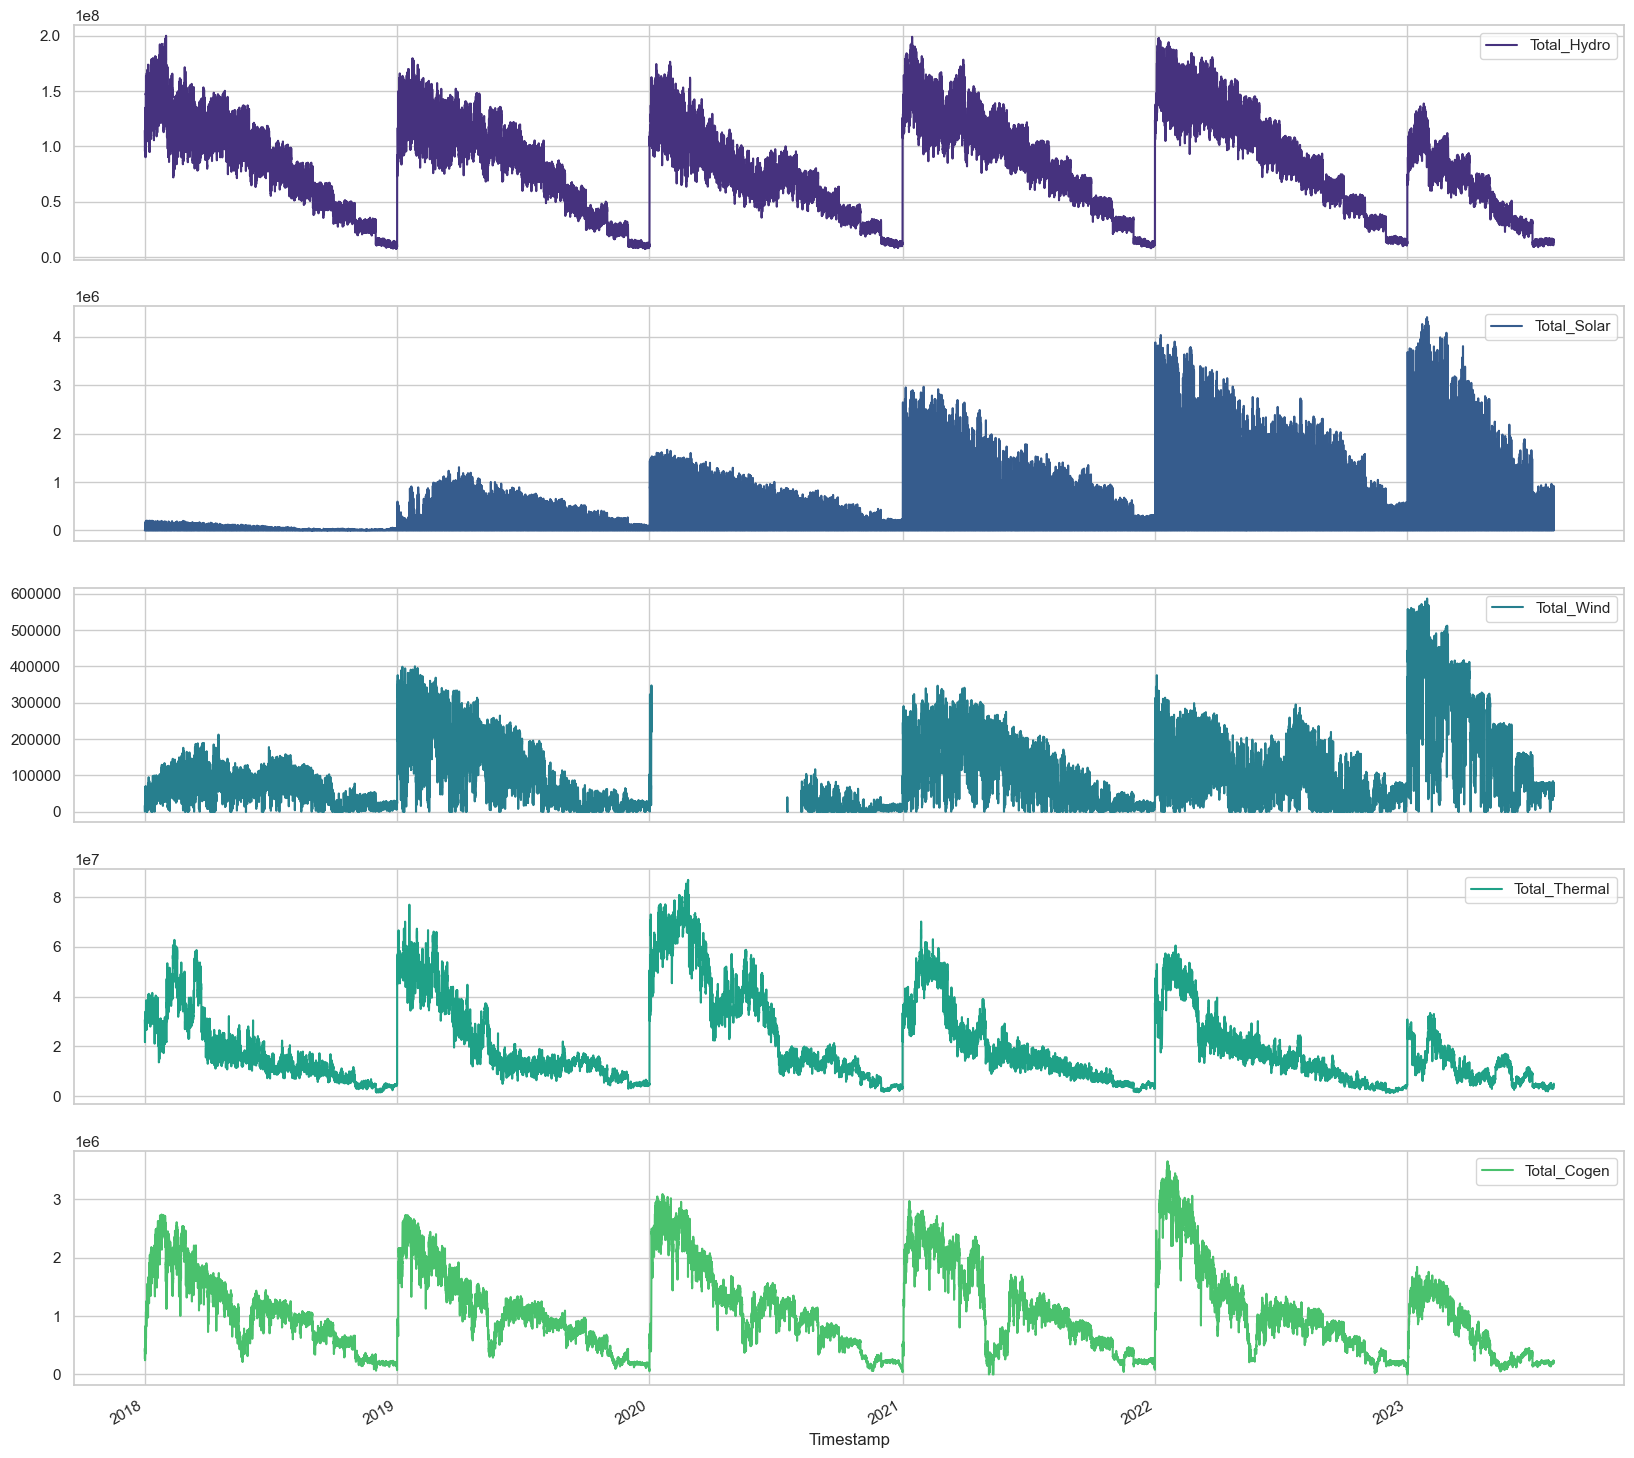

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100

prod.plot(subplots=True, figsize=(20, 20))

plt.xlabel('Timestamp')
plt.show()



c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\thibo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


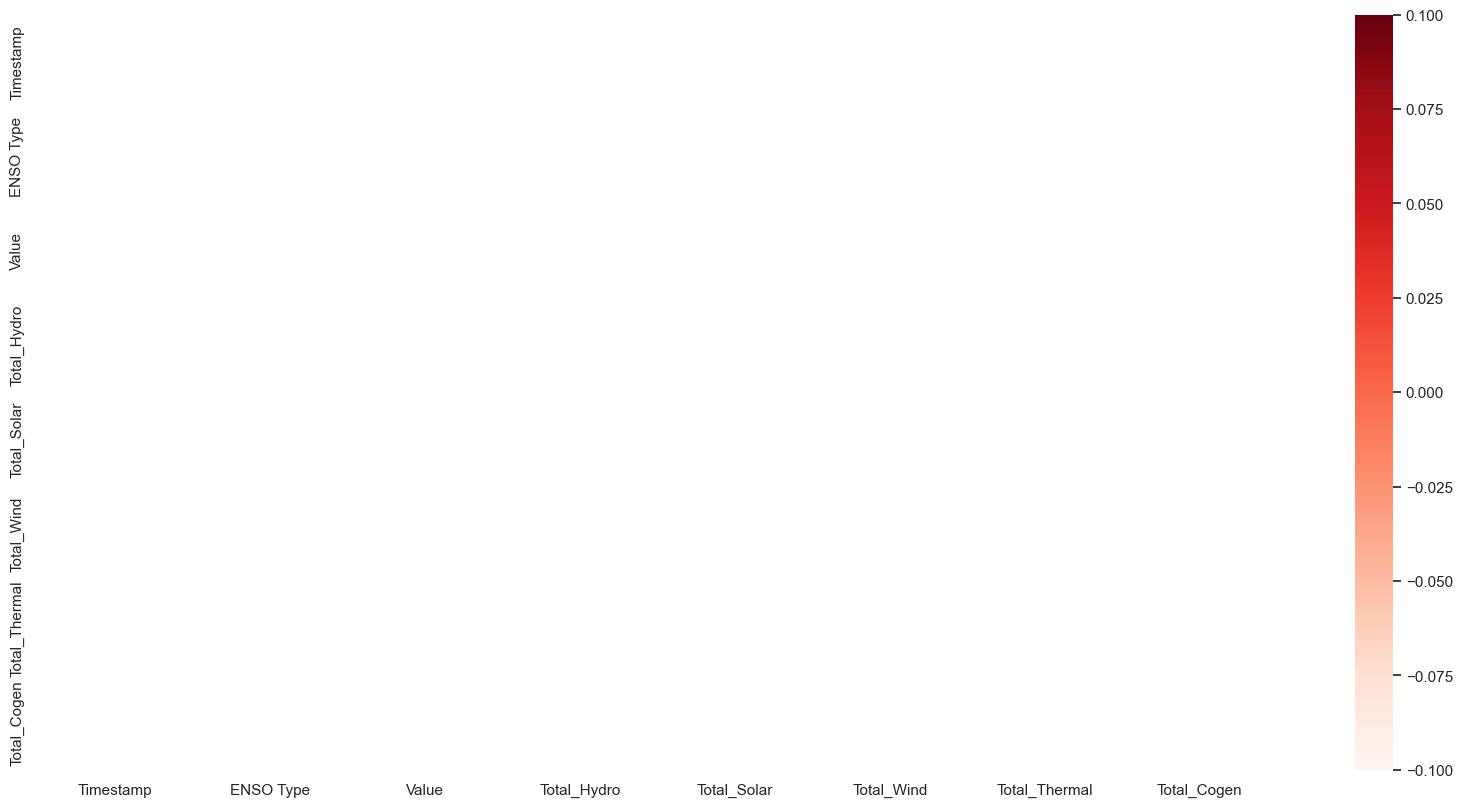

In [25]:
#corrplot
import seaborn as sns
import matplotlib.pyplot as plt
corr = ensoe_prod.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [8]:
ensoe_prod.describe()

,Timestamp,Value,Total_Hydro,Total_Solar,Total_Wind,Total_Thermal,Total_Cogen
count,40457,40457.000000,4.045700e+04,4.045700e+04,40457.000000,4.045700e+04,4.045700e+04
mean,2020-10-02 16:59:37.487208448,-0.339170,8.068576e+07,3.788876e+05,98267.163146,1.786418e+07,1.044049e+06
min,2018-01-01 01:00:00,-1.300000,7.247722e+06,0.000000e+00,0.000000,1.239337e+06,0.000000e+00
25%,2019-03-16 18:00:00,-0.900000,4.377772e+07,0.000000e+00,18216.740000,8.215486e+06,5.179563e+05
50%,2020-12-30 12:00:00,-0.500000,7.987873e+07,2.707200e+03,67609.560000,1.365226e+07,9.345686e+05
75%,2022-03-16 06:00:00,0.300000,1.141399e+08,3.990017e+05,145962.000000,2.236460e+07,1.425513e+06
max,2023-05-31 23:00:00,0.900000,1.998782e+08,4.409158e+06,586495.840000,7.696950e+07,3.654861e+06
std,NaN,0.670973,4.372617e+07,7.324420e+05,102413.225956,1.392043e+07,6.984845e+05


In [9]:
ensoe_prod.head(500)


,Timestamp,ENSO Type,Value,Total_Hydro,Total_Solar,Total_Wind,Total_Thermal,Total_Cogen
1,2018-01-01 01:00:00,WL,-0.9,1.142477e+08,0.0,16582.08,30649151.28,269505.36
2,2018-01-01 02:00:00,WL,-0.9,1.086512e+08,0.0,8048.16,30388170.48,384240.24
3,2018-01-01 03:00:00,WL,-0.9,1.050158e+08,0.0,9896.64,29823144.48,308843.28
4,2018-01-01 04:00:00,WL,-0.9,1.014067e+08,0.0,7542.96,29170935.12,302660.88
5,2018-01-01 05:00:00,WL,-0.9,9.911392e+07,0.0,2879.52,28528766.88,449459.76
...,...,...,...,...,...,...,...,...
517,2018-01-22 13:00:00,WL,-0.9,1.777458e+08,179827.2,100919.76,23879657.28,1933296.96
518,2018-01-22 14:00:00,WL,-0.9,1.793314e+08,83577.6,102502.32,23345673.36,1885596.96
519,2018-01-22 15:00:00,WL,-0.9,1.817936e+08,63360.0,82700.88,24911012.64,2147930.40
520,2018-01-22 16:00:00,WL,-0.9,1.797983e+08,31305.6,100066.32,26125613.28,2023258.32


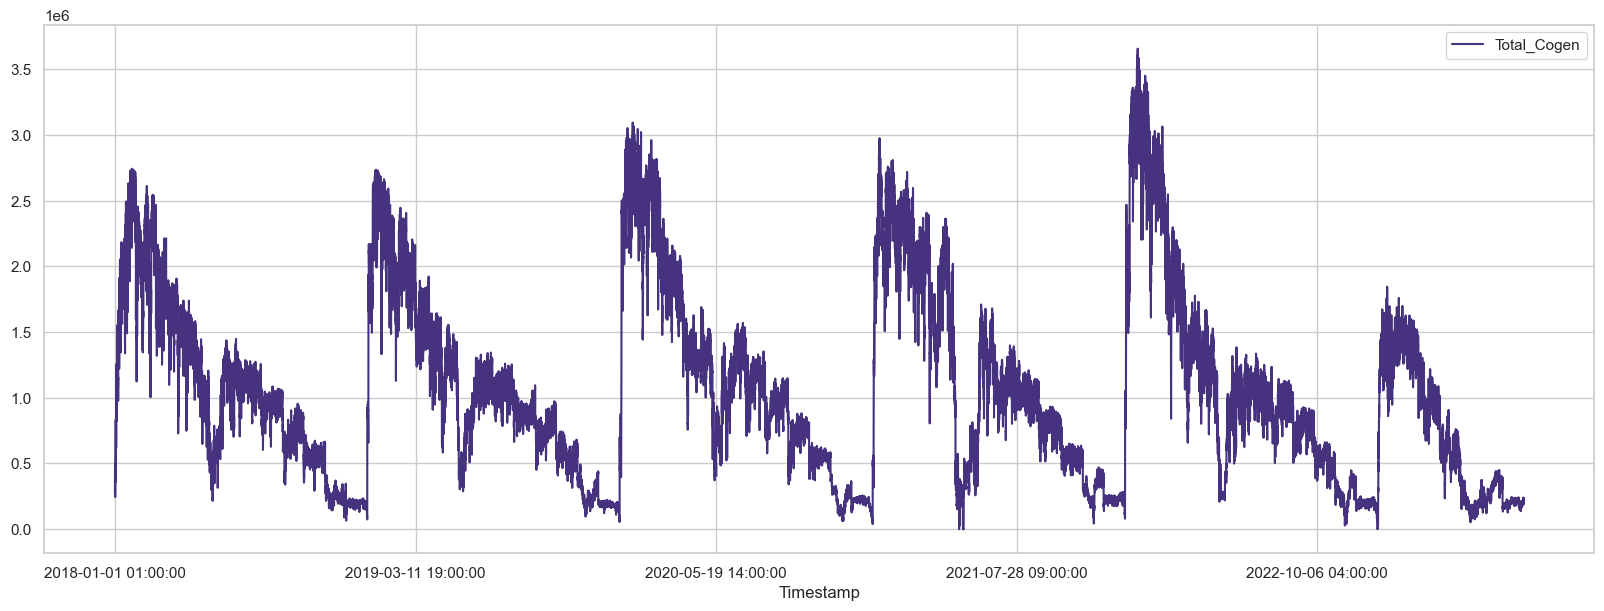

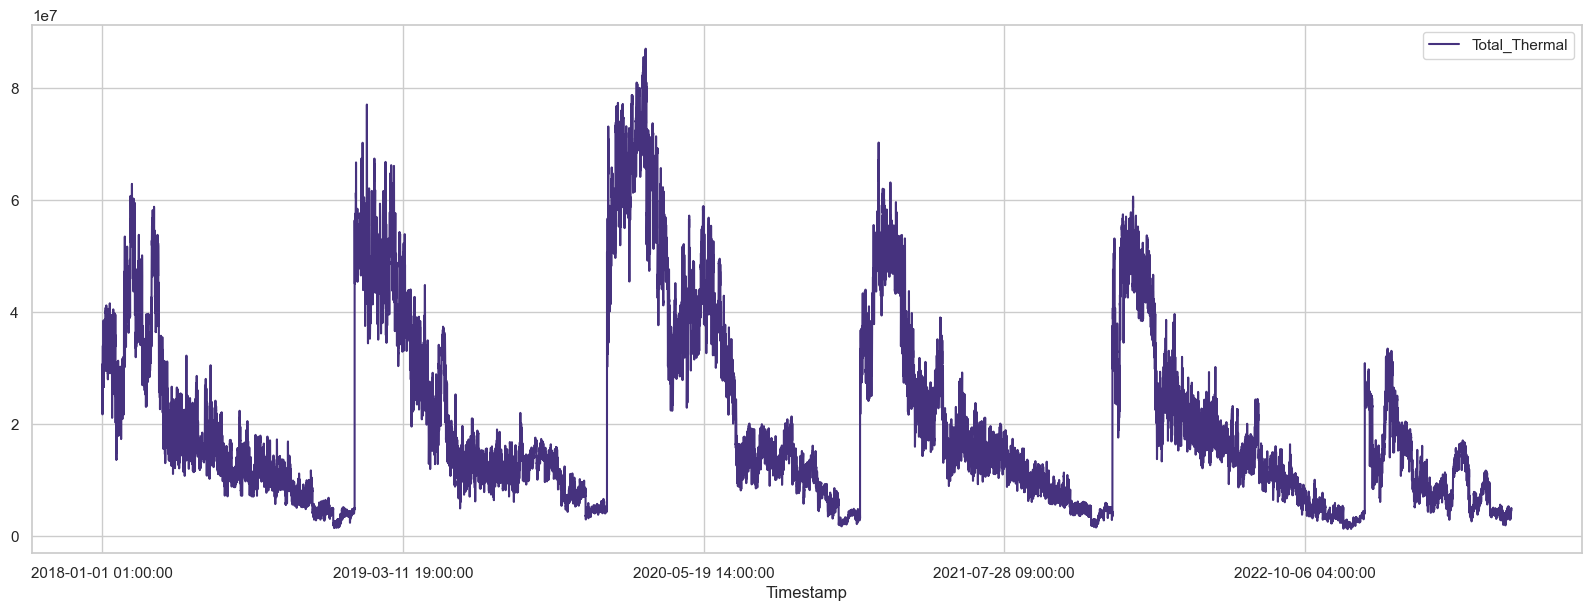

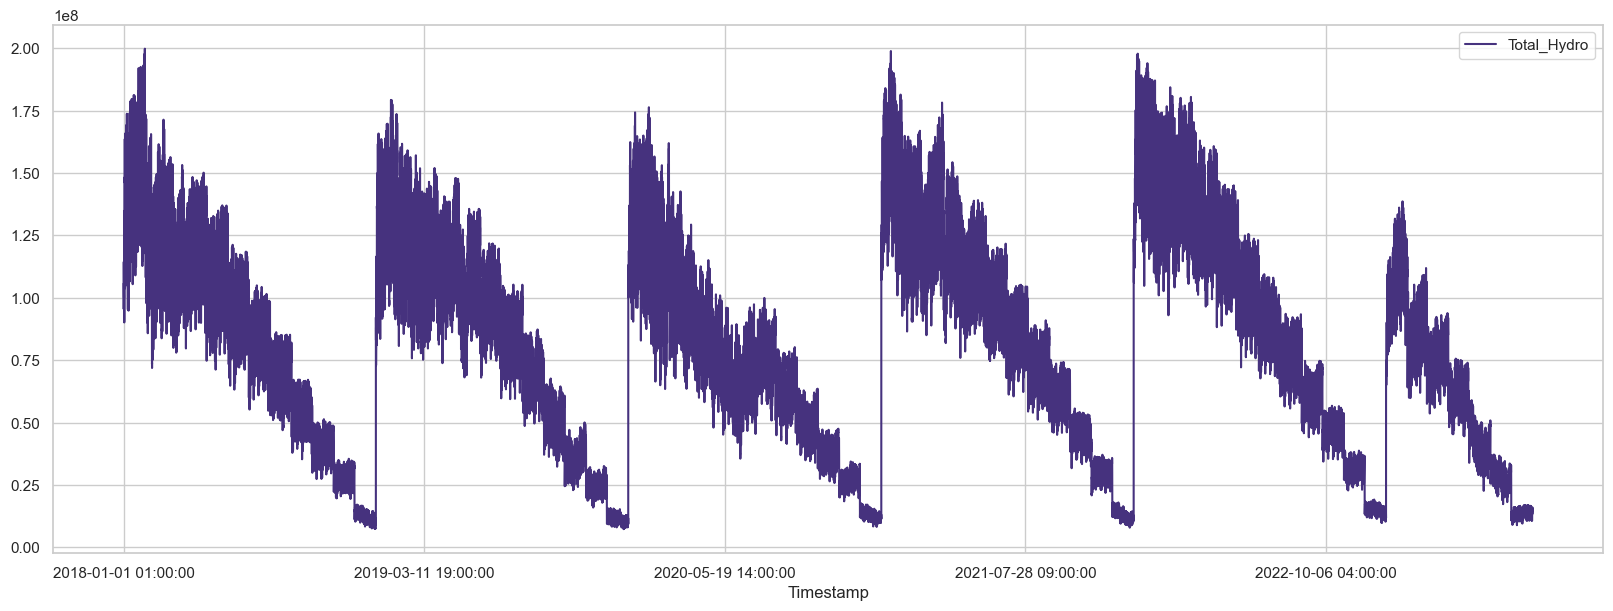

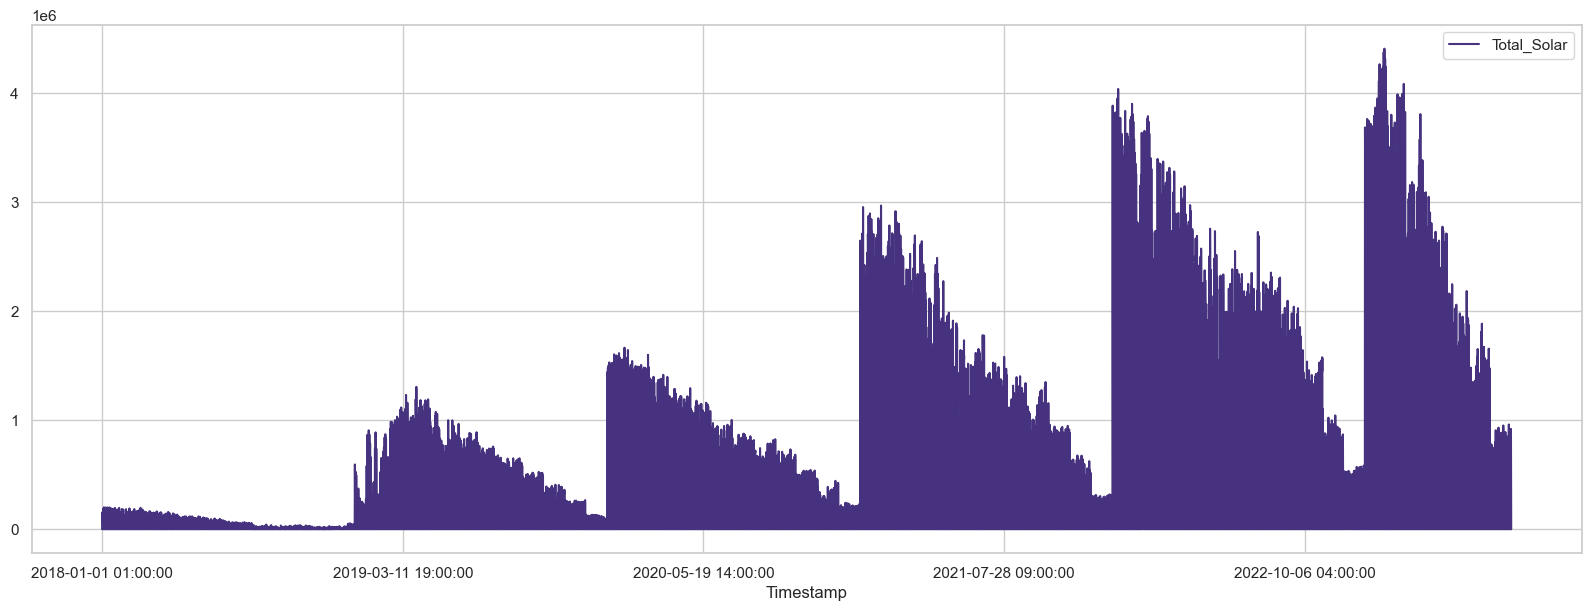

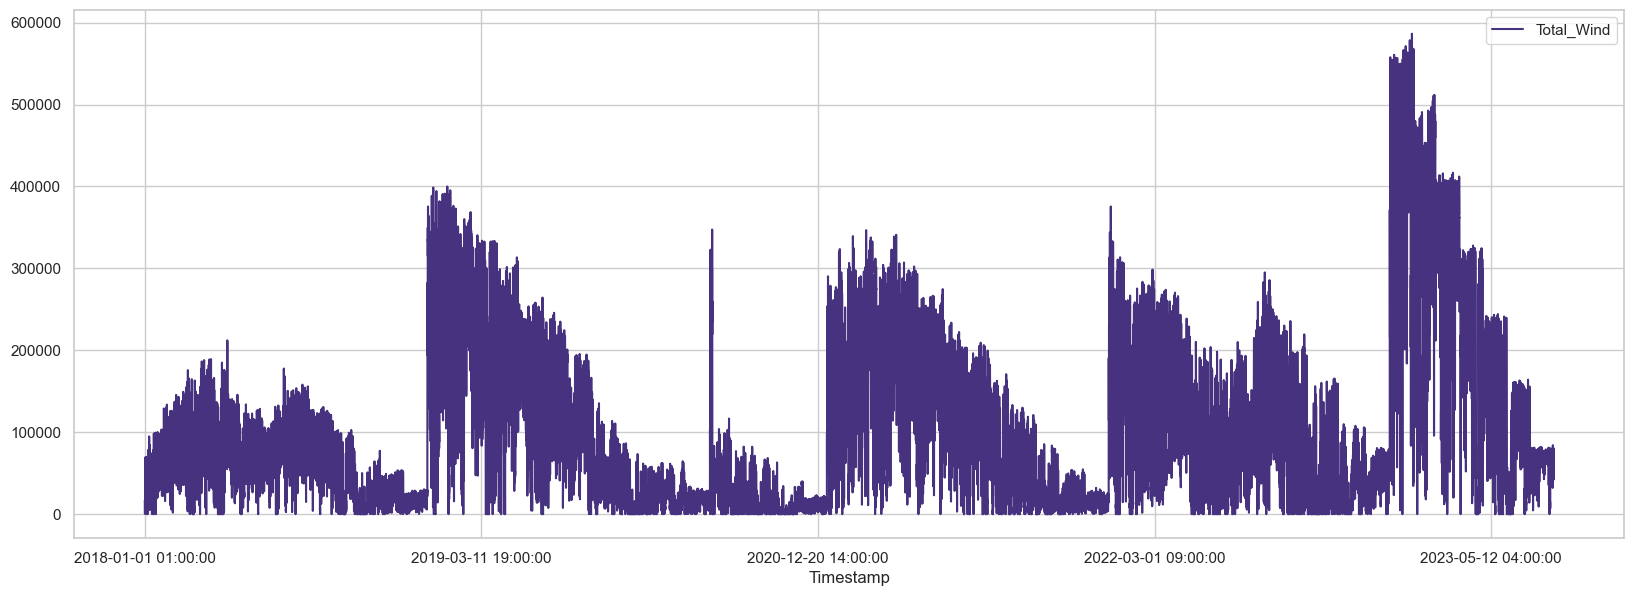

In [10]:
#plot prod cogen
prod_cogen.plot(figsize=(20, 7))
plt.show()

#plot prod thermal
prod_thermal.plot(figsize=(20, 7))
plt.show()

#plot prod hydro
prod_hydro.plot(figsize=(20, 7))
plt.show()

#plot prod solar
prod_solar.plot(figsize=(20, 7))
plt.show()

#plot prod wind
prod_wind.plot(figsize=(20, 7))
plt.show()



Text(0.5, 0, 'Timestamp')

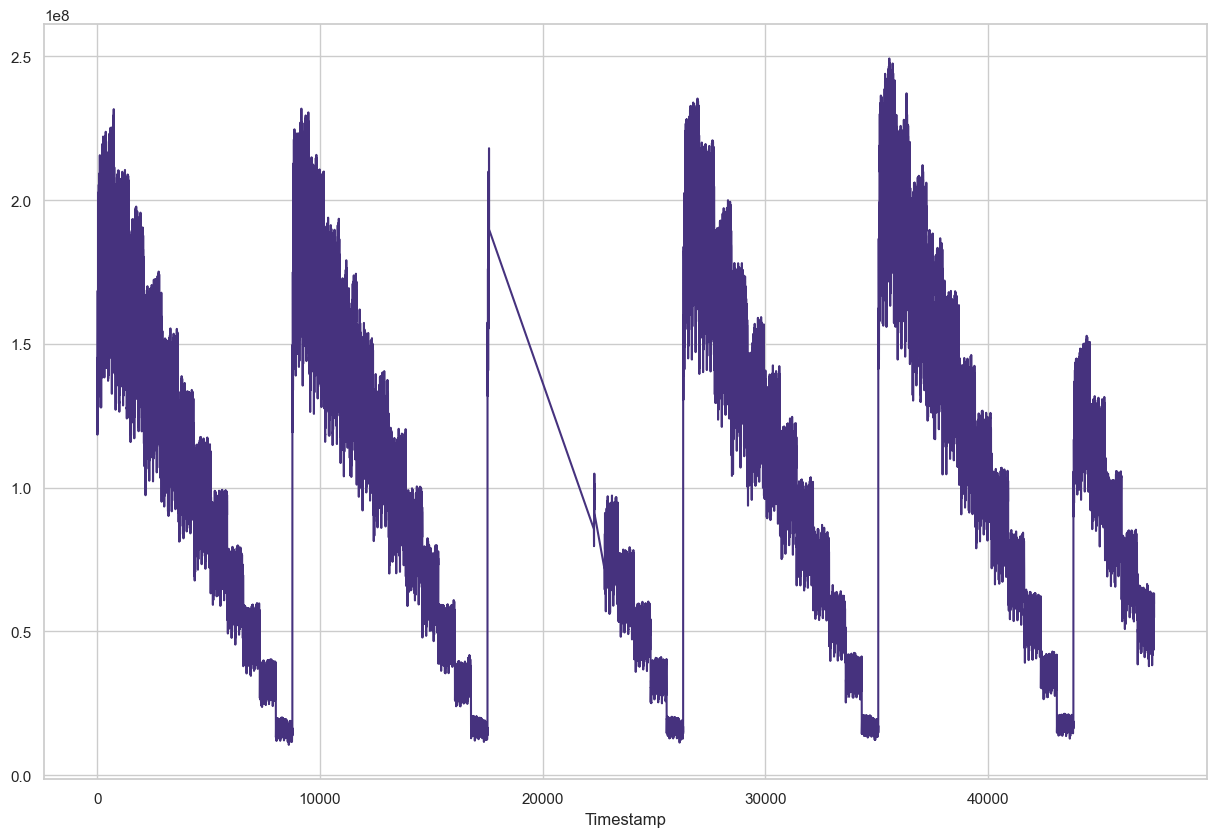

In [15]:
ensoe_prod['Production'] = ensoe_prod['Total_Hydro'] + ensoe_prod['Total_Solar'] + ensoe_prod['Total_Wind'] + ensoe_prod['Total_Thermal'] + ensoe_prod['Total_Cogen']
plt.plot(ensoe_prod['Production'])
plt.xlabel('Timestamp')
